In [10]:
from datetime import datetime, timedelta, timezone
import pytz
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from siphon.catalog import TDSCatalog
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import netCDF4 as Dataset
from metpy.plots import USCOUNTIES




In [2]:

## use this one to tell what the time variable is named ##

def timename(daytah):
    thenumber = 0
    for i in range(len(list(daytah.variables))):
        if list(daytah.variables)[i].startswith('time'):
            thenumber = i
    return(list(daytah.variables)[thenumber])



In [3]:

def yesterday():
    today = datetime.now()
    yesterday = datetime(today.year, today.month, today.day-1, tzinfo=timezone.utc)
    return yesterday.strftime("%Y%m%d")








In [73]:
yesterday()

'20211103'

In [4]:
def yesterday_url():
    baseurl = ('https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg'
          '/GFS_Global_0p5deg_' + yesterday() + '_0000.grib2/'
          'catalog.html?dataset=grib/NCEP/GFS/Global_0p5deg'
          '/GFS_Global_0p5deg_' + yesterday() + '_0000.grib2')
    return baseurl

In [75]:
yesterday_url()

'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211103_0000.grib2/catalog.html?dataset=grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211103_0000.grib2'

In [5]:
def get_data():
    yesterdaygfs = TDSCatalog(yesterday_url())
    yday = yesterdaygfs.datasets[0]
    ncss = yday.subset()
    today = datetime.now()
    yesterday = datetime(today.year, today.month, today.day-1, tzinfo=timezone.utc)
    query = ncss.query()
    query.lonlat_box(north=50, south=35, east=-80, west=-104).time_range(yesterday, yesterday+timedelta(16))
    query.accept('netcdf4')
    query.variables('Precipitation_rate_surface')
    data = ncss.get_data(query)
    return data
    

In [6]:
data = get_data()

/Users/Jeremy/opt/anaconda3/envs/finalprojenv/lib/python3.8/site-packages/siphon/catalog.py:292: UserWarning: URL https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211105_0000.grib2/catalog.html?dataset=grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211105_0000.grib2 returned HTML. Changing to: https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211105_0000.grib2/catalog.xml?dataset=grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211105_0000.grib2
  warnings.warn('URL {} returned HTML. Changing to: {}'.format(self.catalog_url,


In [79]:
timename(data)

'time23'

In [81]:
lats = data.variables['lat'][:]
lons = data.variables['lon'][:]

<ipython-input-81-d68617092c13>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lats = data.variables['lat'][:]
<ipython-input-81-d68617092c13>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lons = data.variables['lon'][:]


In [7]:
ds = xr.open_dataset(xr.backends.NetCDF4DataStore(data))

In [8]:
thyme = timename(data)
print(thyme)

time1


In [100]:
daily_avg_precip = ds.resample(time23='1D').mean()

In [21]:
ds

<xarray.Dataset>
Dimensions:                     (lat: 31, lon: 49, time27: 119)
Coordinates:
  * time27                      (time27) datetime64[ns] 2021-11-04 ... 2021-1...
  * lat                         (lat) float32 50.0 49.5 49.0 ... 36.0 35.5 35.0
  * lon                         (lon) float32 256.0 256.5 257.0 ... 279.5 280.0
Data variables:
    Precipitation_rate_surface  (time27, lat, lon) float32 ...
    LatLon_Projection           int32 0
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

In [177]:
ds_daily_rainfall = ds.resample(time27='1D').mean()*60*60*24

In [ ]:
### I need to rename the columns so they're "time" "lat" and "lon" because
### it changes like every time - if it's time3 time2 or in this case time27

In [96]:
print(ds.variables[thyme].name)

time27


In [136]:
timetwo = [thyme]

In [138]:
timetwo[0]

'time27'

In [175]:
ds

<xarray.Dataset>
Dimensions:                     (lat: 31, lon: 49, time27: 119)
Coordinates:
  * time27                      (time27) datetime64[ns] 2021-11-04 ... 2021-1...
  * lat                         (lat) float32 50.0 49.5 49.0 ... 36.0 35.5 35.0
  * lon                         (lon) float32 256.0 256.5 257.0 ... 279.5 280.0
Data variables:
    Precipitation_rate_surface  (time27, lat, lon) float32 0.0 0.0 ... 0.0 0.0
    LatLon_Projection           int32 0
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

In [184]:
### goodness -- the below works...

In [9]:
ds = ds.rename({thyme: 'time'})

In [10]:
dailyrain = ds.resample(time='1D').mean()*60*60*24/25.4

In [11]:
dailyrain

<xarray.Dataset>
Dimensions:                     (lat: 31, lon: 49, time: 17)
Coordinates:
  * time                        (time) datetime64[ns] 2021-11-05 ... 2021-11-21
  * lat                         (lat) float32 50.0 49.5 49.0 ... 36.0 35.5 35.0
  * lon                         (lon) float32 256.0 256.5 257.0 ... 279.5 280.0
Data variables:
    Precipitation_rate_surface  (time, lat, lon) float32 0.0 0.01565 ... 0.0 0.0
    LatLon_Projection           (time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [128]:
df = xr.DataArray.to_dataframe(ds['Precipitation_rate_surface'])  #i need to try without resetting the index

In [131]:
df = df.groupby([pd.Grouper(level='lat'), 
            pd.Grouper(level='lon'), 
            pd.Grouper(level=thyme, freq='1D')]
          ).mean()

In [136]:
df

Precipitation_rate_surface
lat  lon   time23                                
35.0 256.0 2021-11-03                5.000000e-07
           2021-11-04                0.000000e+00
           2021-11-05                0.000000e+00
           2021-11-06                0.000000e+00
           2021-11-07                0.000000e+00
...                                           ...
50.0 280.0 2021-11-15                2.400000e-06
           2021-11-16                8.500000e-06
           2021-11-17                1.745000e-05
           2021-11-18                0.000000e+00
           2021-11-19                0.000000e+00

[25823 rows x 1 columns]

In [140]:
df.index.names

FrozenList(['lat', 'lon', 'time23'])

In [143]:
df = df * 60 * 60 * 24  #convert average for the day into daily

In [149]:
df = df.reset_index()

In [150]:
df

lat    lon     time23  Precipitation_rate_surface
0      35.0  256.0 2021-11-03                     0.04320
1      35.0  256.0 2021-11-04                     0.00000
2      35.0  256.0 2021-11-05                     0.00000
3      35.0  256.0 2021-11-06                     0.00000
4      35.0  256.0 2021-11-07                     0.00000
...     ...    ...        ...                         ...
25818  50.0  280.0 2021-11-15                     0.20736
25819  50.0  280.0 2021-11-16                     0.73440
25820  50.0  280.0 2021-11-17                     1.50768
25821  50.0  280.0 2021-11-18                     0.00000
25822  50.0  280.0 2021-11-19                     0.00000

[25823 rows x 4 columns]

In [153]:
timez = df[thyme].unique()

In [159]:
frame = []
for i in range(len(timez)):
    frame[i] = df[timez[i]]

KeyError: numpy.datetime64('2021-11-03T00:00:00.000000000')

In [172]:
timez[0]

numpy.datetime64('2021-11-03T00:00:00.000000000')

In [166]:
df.loc('time23' == '2021-11-03')

In [178]:
df[thyme].unique()[0]

numpy.datetime64('2021-11-03T00:00:00.000000000')

In [181]:
time2 = pd.to_datetime(timez[0])

In [185]:
df = df.loc[df[thyme] == time2]

In [186]:
df

lat    lon     time23  Precipitation_rate_surface
0      35.0  256.0 2021-11-03                     0.04320
17     35.0  256.5 2021-11-03                     0.08640
34     35.0  257.0 2021-11-03                     0.02592
51     35.0  257.5 2021-11-03                     0.05616
68     35.0  258.0 2021-11-03                     0.34128
...     ...    ...        ...                         ...
25738  50.0  278.0 2021-11-03                     0.62640
25755  50.0  278.5 2021-11-03                     1.88784
25772  50.0  279.0 2021-11-03                     2.71296
25789  50.0  279.5 2021-11-03                     2.47536
25806  50.0  280.0 2021-11-03                     1.17072

[1519 rows x 4 columns]

In [202]:
lats = df['lat'][:]
lons = df['lon'][:]

In [204]:
df

lat    lon     time23  Precipitation_rate_surface
0      35.0  256.0 2021-11-03                     0.04320
17     35.0  256.5 2021-11-03                     0.08640
34     35.0  257.0 2021-11-03                     0.02592
51     35.0  257.5 2021-11-03                     0.05616
68     35.0  258.0 2021-11-03                     0.34128
...     ...    ...        ...                         ...
25738  50.0  278.0 2021-11-03                     0.62640
25755  50.0  278.5 2021-11-03                     1.88784
25772  50.0  279.0 2021-11-03                     2.71296
25789  50.0  279.5 2021-11-03                     2.47536
25806  50.0  280.0 2021-11-03                     1.17072

[1519 rows x 4 columns]

In [ ]:
###reference
#x = dftest.index.values
#y = dftest.columns.values
#z = dftest.values
#X,Y = np.meshgrid(x,y)
#Z = z.T
#plt.contourf(X,Y,Z,20,cmap='jet')
#plt.colorbar()
#plt.show()

In [205]:
lons, lats = np.meshgrid(df['lon'], df['lat'])

In [208]:
rain = df['Precipitation_rate_surface'].T

In [211]:
del df[thyme]

In [217]:
df = df.set_index(['lat', 'lon'])

In [218]:
ds2 = df.to_xarray()

In [224]:
rain = ds2['Precipitation_rate_surface']

In [12]:
lats = ds2['lat'][:]
lons = ds2['lon'][:]

NameError: name 'ds2' is not defined

In [13]:
%matplotlib inline

/Users/Jeremy/opt/anaconda3/envs/finalprojenv/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/Users/Jeremy/opt/anaconda3/envs/finalprojenv/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/Users/Jeremy/opt/anaconda3/envs/finalprojenv/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


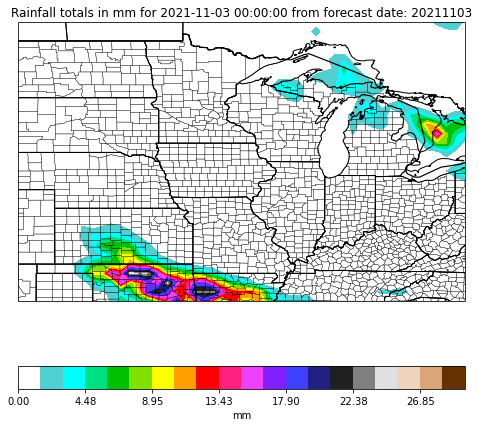

In [228]:


fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

 

# draw coastlines, state and country boundaries, edge of map.

ax.coastlines()

ax.add_feature(cfeature.BORDERS, linewidth=1.2)

ax.add_feature(cfeature.STATES)

ax.add_feature(USCOUNTIES, linewidth=0.3)

 

# draw filled contours.

#clevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,

#         50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750]

 

clevs = np.linspace(0,rain.max()*1.2,21)

 

 

# In future MetPy

# norm, cmap = ctables.registry.get_with_boundaries('precipitation', clevs)

cmap_data = [(1.0, 1.0, 1.0),

             (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),

             (0.0, 1.0, 1.0),

             (0.0, 0.8784313797950745, 0.501960813999176),

             (0.0, 0.7529411911964417, 0.0),

             (0.501960813999176, 0.8784313797950745, 0.0),

             (1.0, 1.0, 0.0),

             (1.0, 0.6274510025978088, 0.0),

             (1.0, 0.0, 0.0),

             (1.0, 0.125490203499794, 0.501960813999176),

             (0.9411764740943909, 0.250980406999588, 1.0),

             (0.501960813999176, 0.125490203499794, 1.0),

             (0.250980406999588, 0.250980406999588, 1.0),

             (0.125490203499794, 0.125490203499794, 0.501960813999176),

             (0.125490203499794, 0.125490203499794, 0.125490203499794),

             (0.501960813999176, 0.501960813999176, 0.501960813999176),

             (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),

             (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),

             (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),

             (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),

             (0.4000000059604645, 0.20000000298023224, 0.0)]

cmap = mcolors.ListedColormap(cmap_data, 'precipitation')

norm = mcolors.BoundaryNorm(clevs, cmap.N)

 

cs = ax.contourf(lons, lats, rain, clevs, cmap=cmap, norm=norm)

 

# add colorbar.

cbar = plt.colorbar(cs, orientation='horizontal')

cbar.set_label('mm')

 

ax.set_title(f'Rainfall totals in mm for %s from forecast date: %s' % (time2, yesterday()))

plt.show()


In [199]:
ds = ds/25.4

In [200]:
ds

<xarray.Dataset>
Dimensions:                     (lat: 31, lon: 49, time: 119)
Coordinates:
  * time                        (time) datetime64[ns] 2021-11-04 ... 2021-11-20
  * lat                         (lat) float32 50.0 49.5 49.0 ... 36.0 35.5 35.0
  * lon                         (lon) float32 256.0 256.5 257.0 ... 279.5 280.0
Data variables:
    Precipitation_rate_surface  (time, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0
    LatLon_Projection           float64 0.0
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

In [14]:
rain = ds["Precipitation_rate_surface"][0,:,:]

In [15]:
lats = ds['lat'][:]
lons = ds['lon'][:]

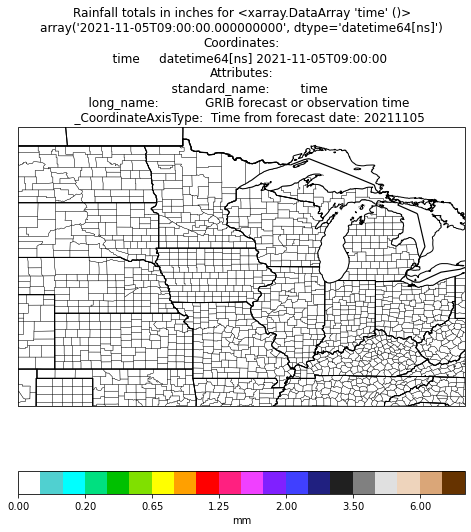

In [16]:


fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

 

# draw coastlines, state and country boundaries, edge of map.

ax.coastlines()

ax.add_feature(cfeature.BORDERS, linewidth=1.2)

ax.add_feature(cfeature.STATES)

ax.add_feature(USCOUNTIES, linewidth=0.3)

 

# draw filled contours.

clevs = [0, 0.05, 0.10, 0.20, 0.35, 0.5, 0.65, 0.8, 1.0, 1.25,

         1.5, 1.75, 2, 2.5, 3, 3.5, 4, 5, 6, 7, 8]

 

#clevs = np.linspace(0,rain.max()*1.2,21)

 

 

# In future MetPy

# norm, cmap = ctables.registry.get_with_boundaries('precipitation', clevs)

cmap_data = [(1.0, 1.0, 1.0),

             (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),

             (0.0, 1.0, 1.0),

             (0.0, 0.8784313797950745, 0.501960813999176),

             (0.0, 0.7529411911964417, 0.0),

             (0.501960813999176, 0.8784313797950745, 0.0),

             (1.0, 1.0, 0.0),

             (1.0, 0.6274510025978088, 0.0),

             (1.0, 0.0, 0.0),

             (1.0, 0.125490203499794, 0.501960813999176),

             (0.9411764740943909, 0.250980406999588, 1.0),

             (0.501960813999176, 0.125490203499794, 1.0),

             (0.250980406999588, 0.250980406999588, 1.0),

             (0.125490203499794, 0.125490203499794, 0.501960813999176),

             (0.125490203499794, 0.125490203499794, 0.125490203499794),

             (0.501960813999176, 0.501960813999176, 0.501960813999176),

             (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),

             (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),

             (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),

             (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),

             (0.4000000059604645, 0.20000000298023224, 0.0)]

cmap = mcolors.ListedColormap(cmap_data, 'precipitation')

norm = mcolors.BoundaryNorm(clevs, cmap.N)

 

cs = ax.contourf(lons, lats, rain, clevs, cmap=cmap, norm=norm)

 

# add colorbar.

cbar = plt.colorbar(cs, orientation='horizontal')

cbar.set_label('mm')

 

ax.set_title(f'Rainfall totals in inches for %s from forecast date: %s' % (ds['Precipitation_rate_surface'][3,:,:]['time'], yesterday()))

plt.show()


In [18]:
ds['Precipitation_rate_surface'][0,:,:]['time'].name

'time'

In [31]:
ds['Precipitation_rate_surface'][0,:,:]['time'].dt.strftime("%Y%m%d")

<xarray.DataArray 'strftime' ()>
array('20211105', dtype=object)
Coordinates:
    time     datetime64[ns] 2021-11-05

In [32]:
###.strftime("%Y%m%d")

In [33]:
ds

<xarray.Dataset>
Dimensions:                     (lat: 31, lon: 49, time: 122)
Coordinates:
  * time                        (time) datetime64[ns] 2021-11-05 ... 2021-11-21
  * lat                         (lat) float32 50.0 49.5 49.0 ... 36.0 35.5 35.0
  * lon                         (lon) float32 256.0 256.5 257.0 ... 279.5 280.0
Data variables:
    Precipitation_rate_surface  (time, lat, lon) float32 ...
    LatLon_Projection           int32 0
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

In [51]:
def yesterday(var = 1):
    yesterday = datetime.utcnow() - timedelta(days=var)
    return yesterday.strftime("%Y%m%d")

In [35]:
yesterday(10)

ValueError: day is out of range for month

In [49]:
datetime.utcnow() - timedelta(days=10)

datetime.datetime(2021, 10, 28, 4, 21, 53, 555772)

In [52]:
yesterday(10)

'20211028'

In [53]:
x = 1

In [54]:
yesterday(x-10)

'20211116'

In [55]:
yesterday(0)

'20211107'

In [56]:
yesterday()

'20211106'

In [2]:
date = datetime(int(input("Year: ")), int(input("Month Number: ")), int(input("Day: ")))

Year:  2021
Month Number:  10
Day:  15


In [23]:
date.astimezone(pytz.utc)

datetime.datetime(2021, 10, 15, 5, 0, tzinfo=<UTC>)

In [24]:
date.strftime("%Y%m%d")

'20211015'

In [4]:
import glob

In [5]:
files=glob.glob("static/pics/*")

files = [file.replace('static/pics/', '') for file in files]

In [7]:
print(files)

['20211110_from_forecast_date:20211106.png', '20211107_from_forecast_date:20211104.png', '20211115_from_forecast_date:20211105.png', '20211115_from_forecast_date:20211104.png', '20211107_from_forecast_date:20211105.png', '20211110_from_forecast_date:20211107.png', '20211110_from_forecast_date:20211105.png', '20211119_from_forecast_date:20211108.png', '20211107_from_forecast_date:20211107.png', '20211115_from_forecast_date:20211106.png', '20211118_from_forecast_date:20211103.png', '20211115_from_forecast_date:20211107.png', '20211107_from_forecast_date:20211106.png', '20211110_from_forecast_date:20211104.png', '20211114_from_forecast_date:20211108.png', '20211118_from_forecast_date:20211106.png', '20211115_from_forecast_date:20211103.png', '20211118_from_forecast_date:20211107.png', '20211107_from_forecast_date:20211103.png', '20211111_from_forecast_date:20211108.png', '20211110_from_forecast_date:20211103.png', '20211122_from_forecast_date:20211108.png', '20211118_from_forecast_date:20

In [48]:
forecast_date = set([x[0:8] for x in files])

In [49]:
forecast_date = list(forecast_date)
print(forecast_date)

['20211122', '20211103', '20211118', '20211113', '20211120', '20211115', '20211112', '20211110', '20211119', '20211109', '20211111', '20211117', '20211107', '20211123', '20211106', '20211121', '20211116', '20211105', '20211114', '20211104', '20211108']


In [50]:
forecast_date = [int(x) for x in forecast_date]
print(forecast_date)

[20211122, 20211103, 20211118, 20211113, 20211120, 20211115, 20211112, 20211110, 20211119, 20211109, 20211111, 20211117, 20211107, 20211123, 20211106, 20211121, 20211116, 20211105, 20211114, 20211104, 20211108]


In [51]:
forecast_date.sort()
print(forecast_date)

[20211103, 20211104, 20211105, 20211106, 20211107, 20211108, 20211109, 20211110, 20211111, 20211112, 20211113, 20211114, 20211115, 20211116, 20211117, 20211118, 20211119, 20211120, 20211121, 20211122, 20211123]


In [52]:
print(forecast_date)

[20211103, 20211104, 20211105, 20211106, 20211107, 20211108, 20211109, 20211110, 20211111, 20211112, 20211113, 20211114, 20211115, 20211116, 20211117, 20211118, 20211119, 20211120, 20211121, 20211122, 20211123]


In [8]:
[file for file in files if file.endswith('20211107.png')]

['20211110_from_forecast_date:20211107.png',
 '20211107_from_forecast_date:20211107.png',
 '20211115_from_forecast_date:20211107.png',
 '20211118_from_forecast_date:20211107.png',
 '20211109_from_forecast_date:20211107.png',
 '20211120_from_forecast_date:20211107.png',
 '20211113_from_forecast_date:20211107.png',
 '20211116_from_forecast_date:20211107.png',
 '20211108_from_forecast_date:20211107.png',
 '20211117_from_forecast_date:20211107.png',
 '20211112_from_forecast_date:20211107.png',
 '20211121_from_forecast_date:20211107.png',
 '20211114_from_forecast_date:20211107.png',
 '20211111_from_forecast_date:20211107.png',
 '20211122_from_forecast_date:20211107.png',
 '20211119_from_forecast_date:20211107.png']

In [54]:
files = glob.glob("static/pics/*")
        
        #I have to only match the first date which was the forecasted date - not the date of the forecast
matching = [s for s in files if '20211111' in s[0:24]]

In [56]:
matching

['static/pics/20211111_from_forecast_date:20211108.png',
 'static/pics/20211111_from_forecast_date:20211104.png',
 'static/pics/20211111_from_forecast_date:20211105.png',
 'static/pics/20211111_from_forecast_date:20211107.png',
 'static/pics/20211111_from_forecast_date:20211106.png',
 'static/pics/20211111_from_forecast_date:20211103.png']

In [57]:
matching.sort()

In [58]:
matching

['static/pics/20211111_from_forecast_date:20211103.png',
 'static/pics/20211111_from_forecast_date:20211104.png',
 'static/pics/20211111_from_forecast_date:20211105.png',
 'static/pics/20211111_from_forecast_date:20211106.png',
 'static/pics/20211111_from_forecast_date:20211107.png',
 'static/pics/20211111_from_forecast_date:20211108.png']

In [11]:
files = glob.glob("static/pics/*")
matching = [s[-12:-4] for s in files]

In [13]:
matching.sort(reverse=True)

In [18]:
date = int(matching[0])

In [19]:
date

20211108

In [29]:
past_day = datetime(int(matching[0][0:4]),int(matching[0][4:6]),int(matching[0][6:8]))

In [25]:
todays_date = datetime.utcnow()
string_date_of_forecast = todays_date.strftime("%Y%m%d")

In [26]:
string_date_of_forecast

'20211111'

In [28]:
today = datetime(todays_date.year, todays_date.month, todays_date.day)

In [31]:
difference = today - past_day

In [ ]:
>>> x = np.timedelta64(2069211000000000, 'ns')
>>> days = x.astype('timedelta64[D]')
>>> days / np.timedelta64(1, 'D')

In [36]:
difference.days

3

In [52]:
import graphics

In [48]:
def yesterday_url(string_date_of_forecast=None):
    
    ### This just puts together the URL for the date you've picked
    ### I can delete the "x=1" part, if I get the dates differently like from user input
    if string_date_of_forecast is None:
        date_of_forecast = datetime(int(input("Year: ")), int(input("Month Number: ")), int(input("Day: "))).astimezone(pytz.utc)
        string_date_of_forecast = date_of_forecast.strftime("%Y%m%d")
    
    
    baseurl = ('https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg'
          '/GFS_Global_0p5deg_' + string_date_of_forecast + '_0000.grib2/'
          'catalog.html?dataset=grib/NCEP/GFS/Global_0p5deg'
          '/GFS_Global_0p5deg_' + string_date_of_forecast + '_0000.grib2')
    return baseurl

In [49]:
yesterday_url('20211112')

'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211112_0000.grib2/catalog.html?dataset=grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211112_0000.grib2'

In [50]:
yesterday_url()

Year:  2021
Month Number:  11
Day:  11


'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211111_0000.grib2/catalog.html?dataset=grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211111_0000.grib2'

In [53]:
graphics.yesterday_url()

Year:  2011
Month Number:  10
Day:  28


'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20111028_0000.grib2/catalog.html?dataset=grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20111028_0000.grib2'

In [54]:
graphics.yesterday_url('20111111')

'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20111111_0000.grib2/catalog.html?dataset=grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20111111_0000.grib2'

In [55]:
def test():
    b = 1
    c = 2
    return b, c

In [57]:
test()[0]

1

In [60]:
test()

(1, 2)

In [6]:
import graphics

SyntaxError: invalid syntax (graphics.py, line 90)

In [15]:
def test(something = None):
    if something == None:
        print(1)
    else:
        print(something)

In [13]:
test('som')

som


In [16]:
test()

1


In [17]:
test(3)

3


In [18]:
test(5)

5


In [54]:
import graphics

In [55]:
graphics.main(forecastdate = '20211111',location = 'Argentina')

NameError: name 'lower' is not defined

In [42]:
graphics.yesterday_url()

'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211111_0000.grib2/catalog.html?dataset=grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211111_0000.grib2'

Year:  2021
Month Number:  11
Day:  11


/Users/Jeremy/opt/anaconda3/envs/finalprojenv/lib/python3.8/site-packages/siphon/catalog.py:292: UserWarning: URL https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211111_0000.grib2/catalog.html?dataset=grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211111_0000.grib2 returned HTML. Changing to: https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211111_0000.grib2/catalog.xml?dataset=grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211111_0000.grib2
  warnings.warn('URL {} returned HTML. Changing to: {}'.format(self.catalog_url,


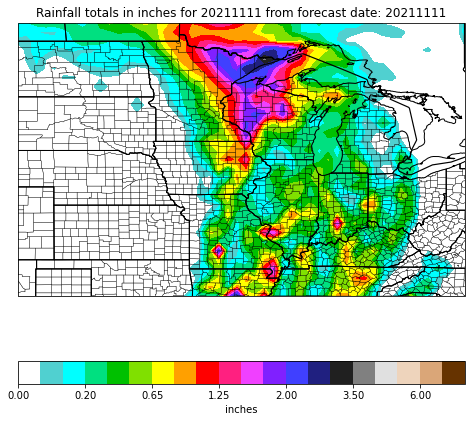

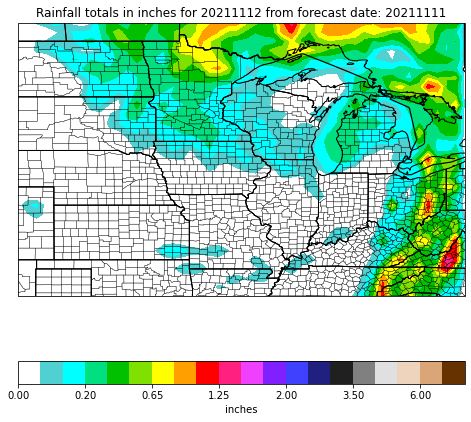

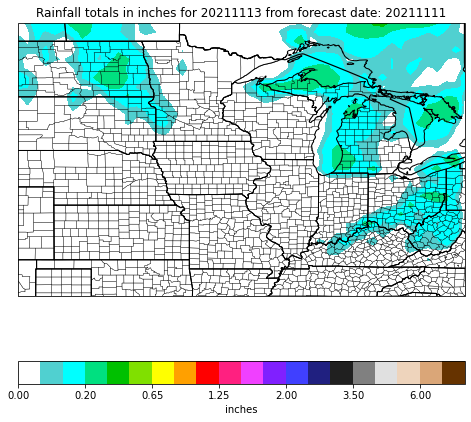

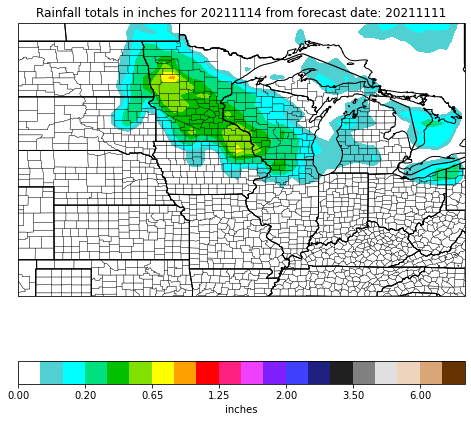

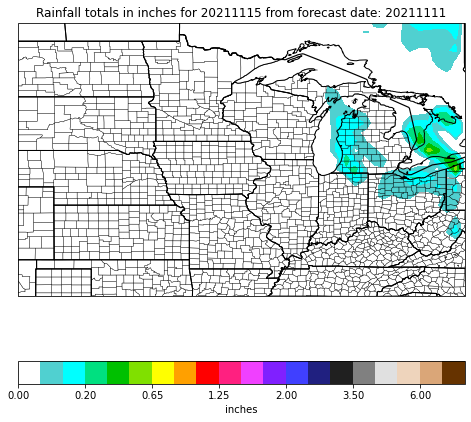

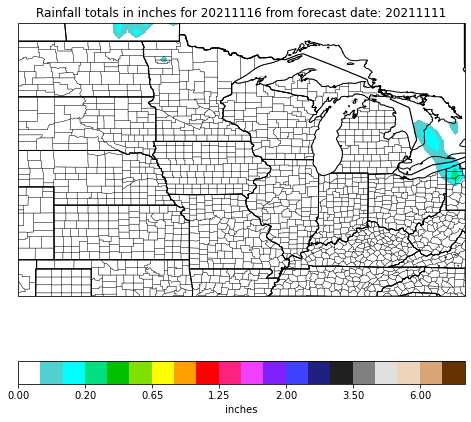

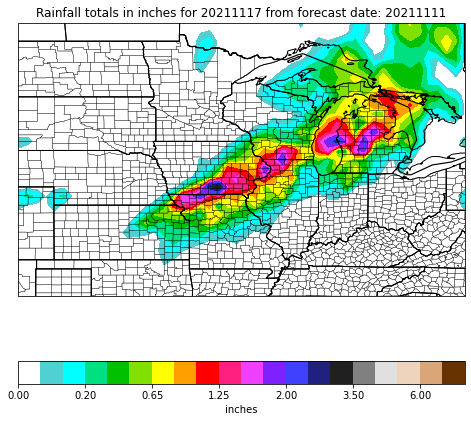

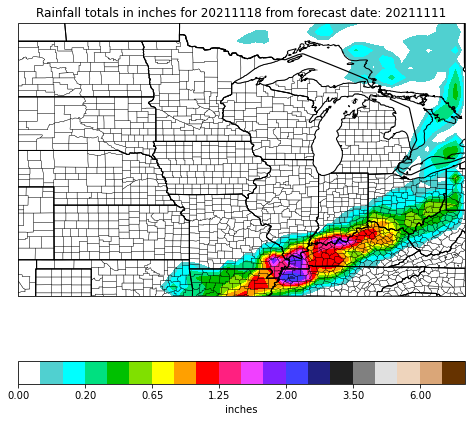

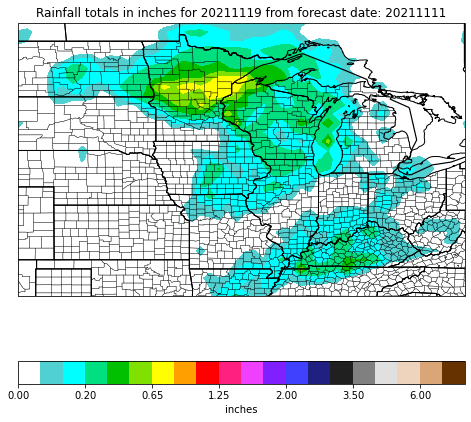

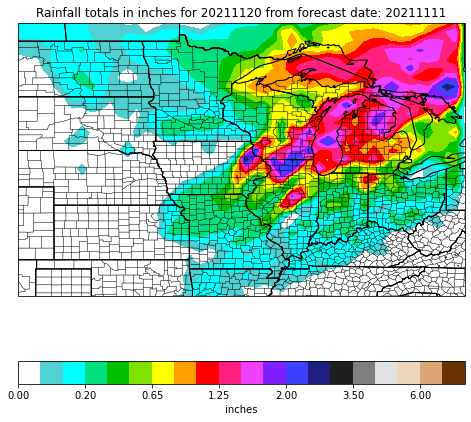

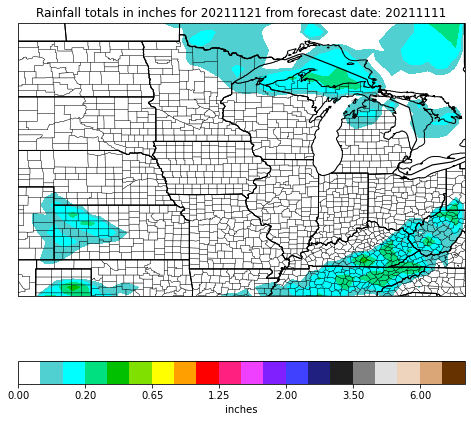

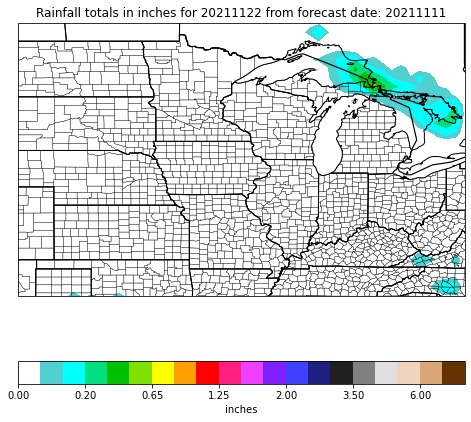

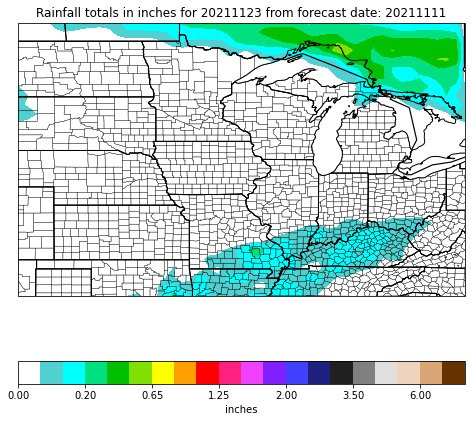

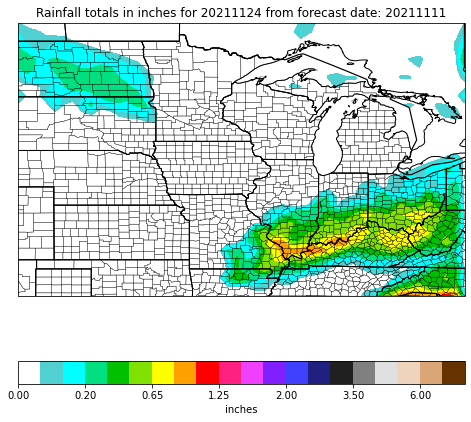

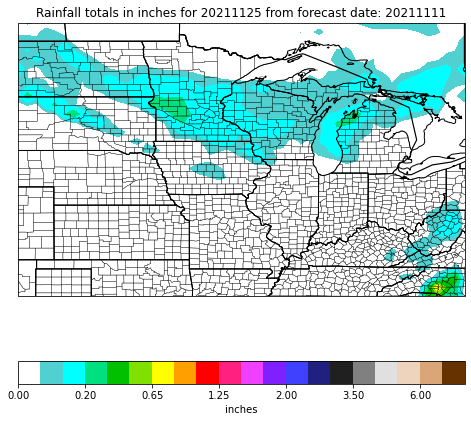

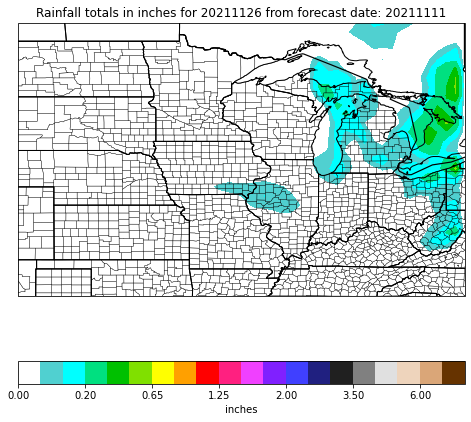

In [43]:
graphics.main()

Year:  2021
Month Number:  11
Day:  11


/Users/Jeremy/opt/anaconda3/envs/finalprojenv/lib/python3.8/site-packages/siphon/catalog.py:292: UserWarning: URL https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211111_0000.grib2/catalog.html?dataset=grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211111_0000.grib2 returned HTML. Changing to: https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211111_0000.grib2/catalog.xml?dataset=grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211111_0000.grib2
  warnings.warn('URL {} returned HTML. Changing to: {}'.format(self.catalog_url,


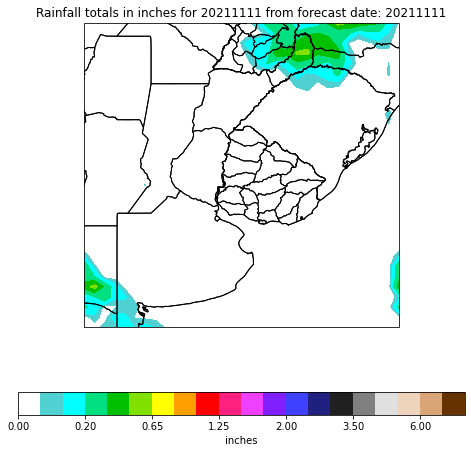

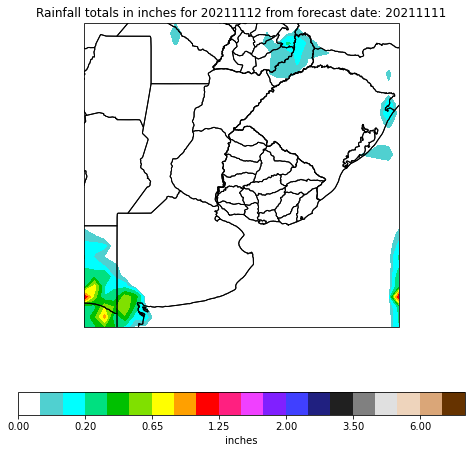

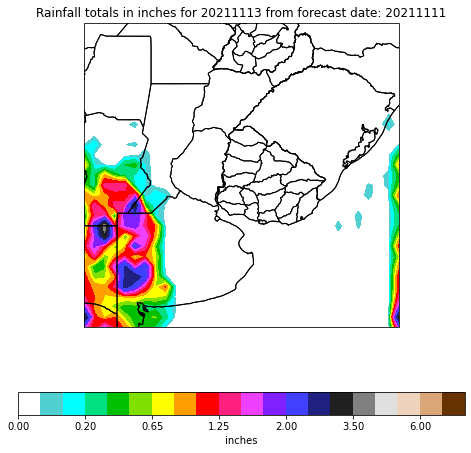

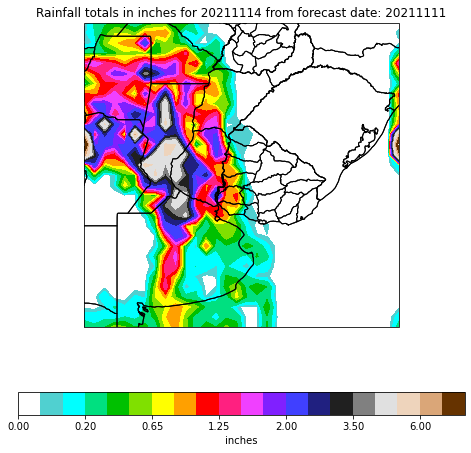

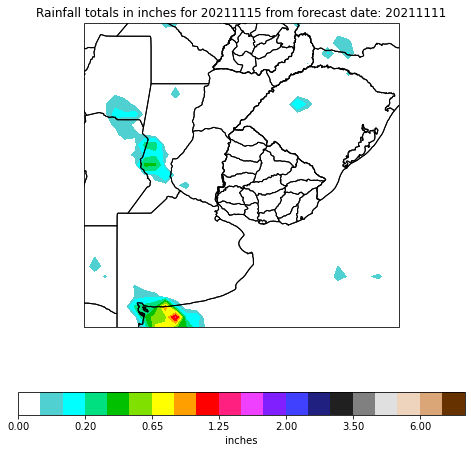

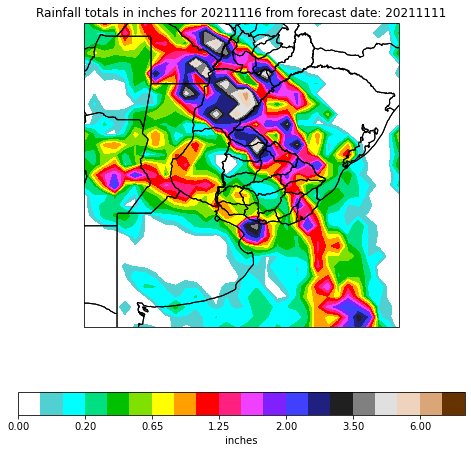

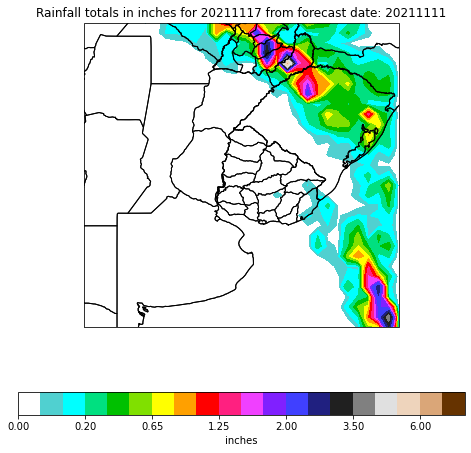

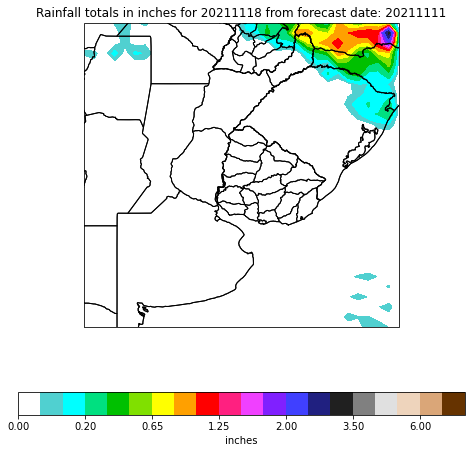

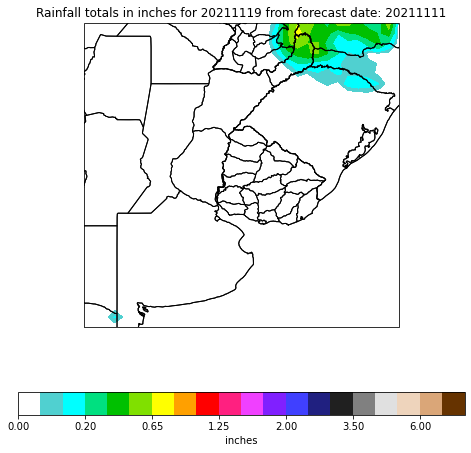

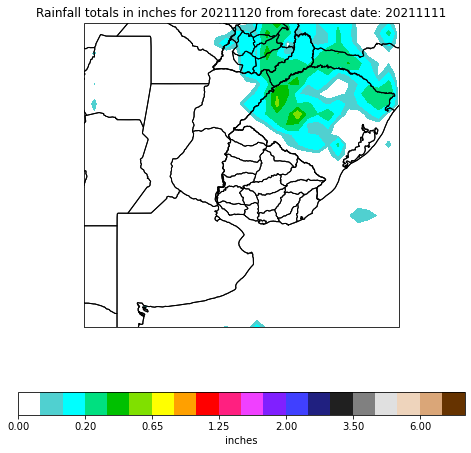

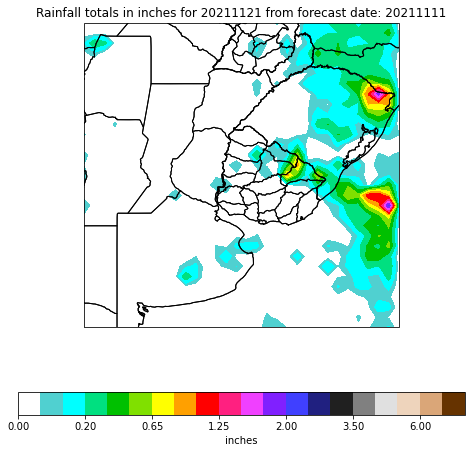

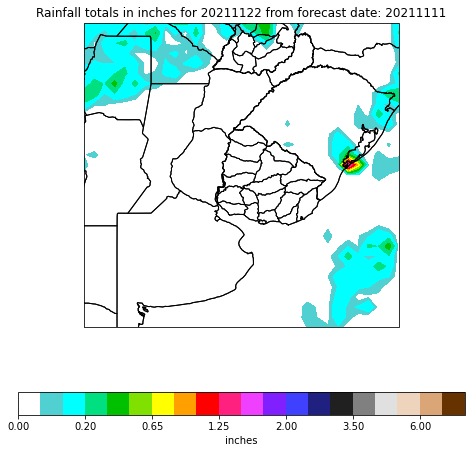

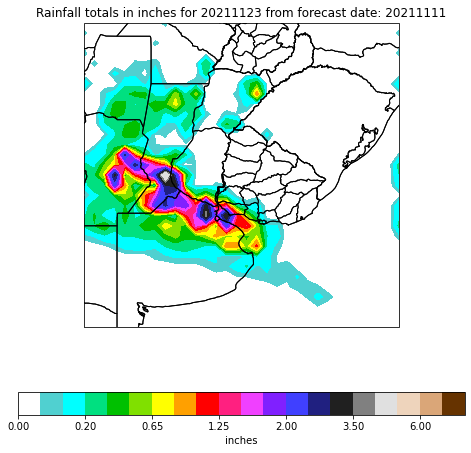

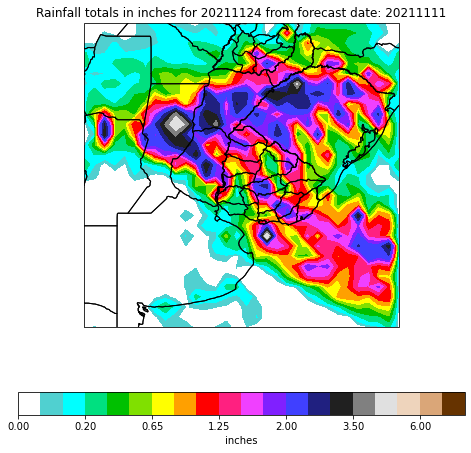

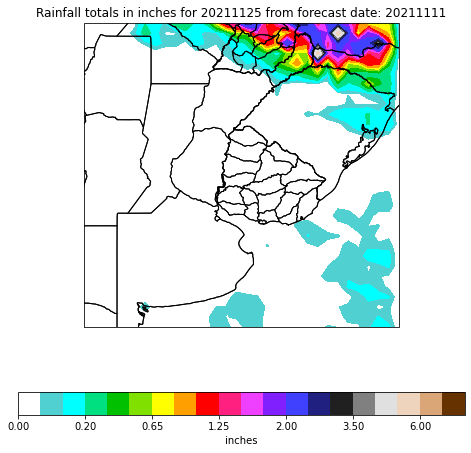

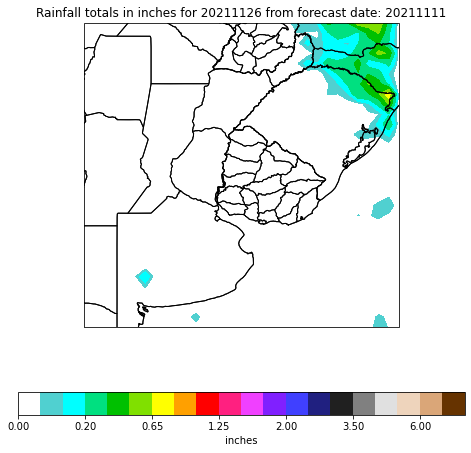

In [4]:
graphics.main(location = "Argentina")

In [13]:
import graphics

Year:  2021
Month Number:  11
Day:  01


/Users/Jeremy/opt/anaconda3/envs/finalprojenv/lib/python3.8/site-packages/siphon/catalog.py:292: UserWarning: URL https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211101_0000.grib2/catalog.html?dataset=grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211101_0000.grib2 returned HTML. Changing to: https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211101_0000.grib2/catalog.xml?dataset=grib/NCEP/GFS/Global_0p5deg/GFS_Global_0p5deg_20211101_0000.grib2
  warnings.warn('URL {} returned HTML. Changing to: {}'.format(self.catalog_url,


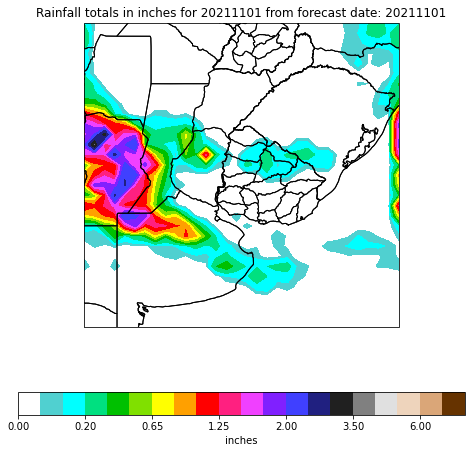

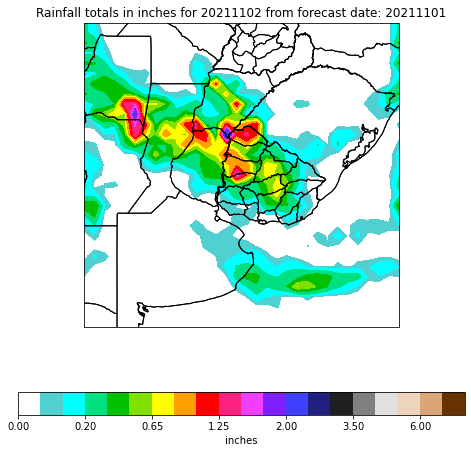

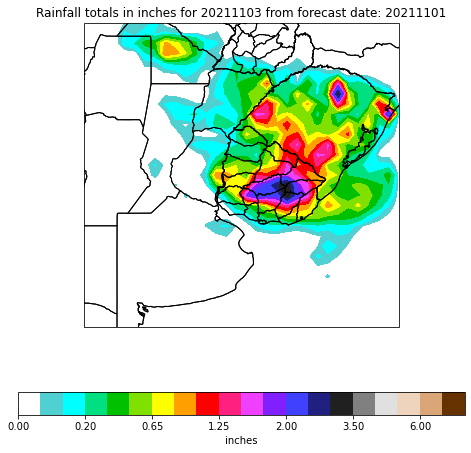

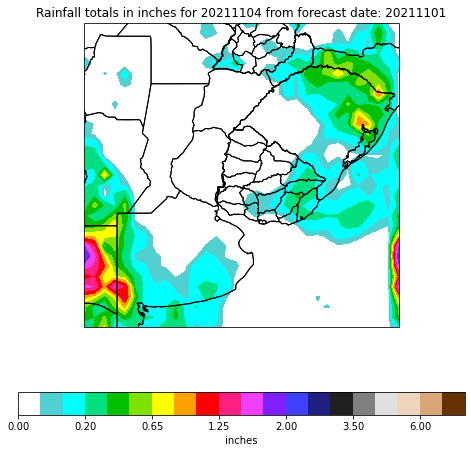

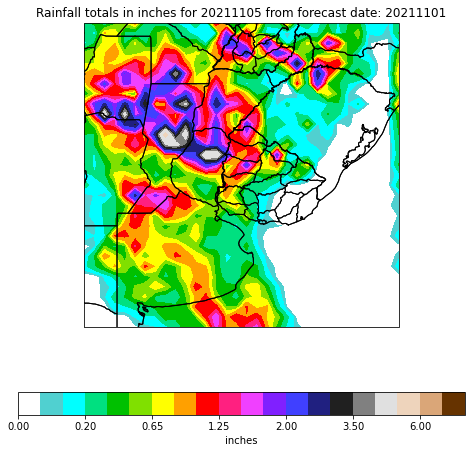

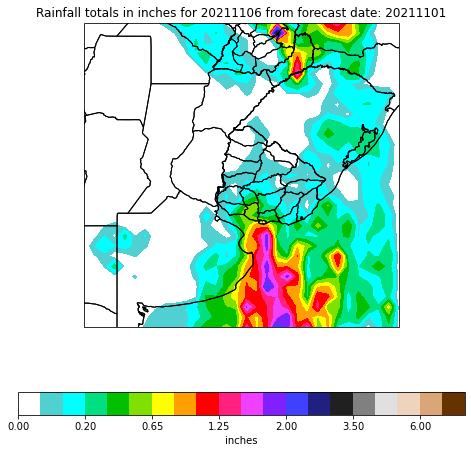

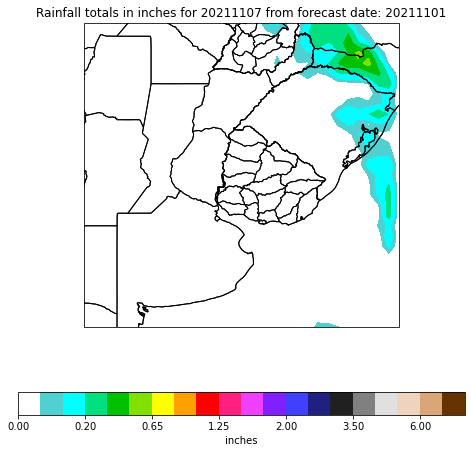

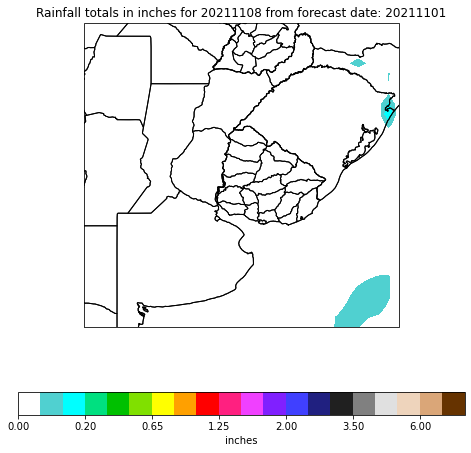

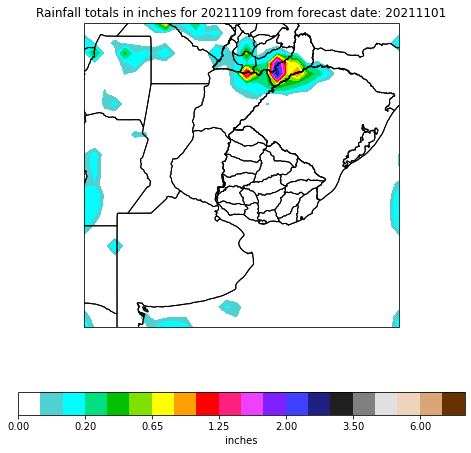

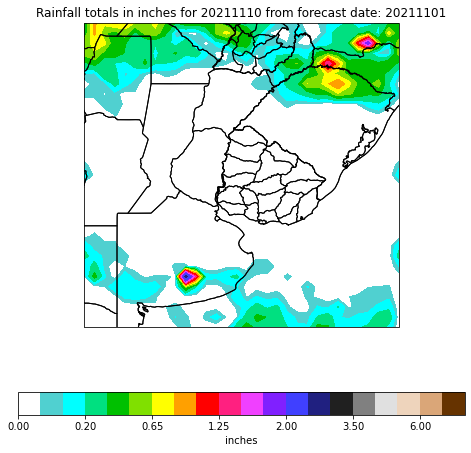

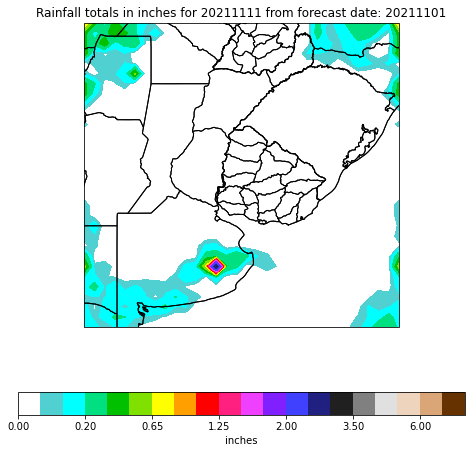

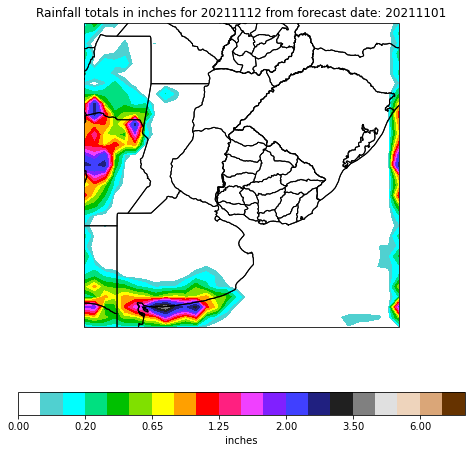

KeyboardInterrupt: 

In [14]:
graphics.main(location = "Argentina")